In [1]:
import regression
import reviews
import season
import neighbourhood

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import choice
import pandas as pd
import numpy as np
import time

In [3]:
df1 = pd.read_csv('listings_summary.csv') 

In [4]:
def attitude(x):
    i = sid.polarity_scores(x)
    comp = i['compound']
    if comp>0.2:
        return 'I am glad to hear that! Allow me to introduce myself :)'
    if comp<-0.2:
        return 'I am sorry to hear that.. Perhaps some of my functions may provide some conviency for your life.'
    else:
        return 'Thanks for sharing that with me. Let me introduce some of my functions.'

In [5]:
def contains(sentence,words):
    for w in words:
        if w in sentence:
            return True
    return False

In [6]:
generalResponses = ["Hmmm. Tell me more.", "Any questions you want to ask about?", "Would you be more specfic?"]

In [7]:
example = 'like example functions instance'.split()

In [8]:
bedroom = 'bedroom bed bedrooms'.split()

In [9]:
Time = 'time season demand year'.split()

In [10]:
another = 'else other another'.split()

In [11]:
other_functions = ["Tell you a secret, I can predict the price of an airbnb listing", 
                   "I can check the availability of an Airbnb listing for you", 
                   "I can give recommandation amoung the Airbnbs"]

In [12]:
general = ['I dont quite understand you', 'Do you mind phrase it differently','I am not sure what you are refering to']

In [13]:
predict = 'predict prediction price'.split()

In [14]:
# availability = 'availability available'.split()

In [15]:
recommendation = 'recommendation recommend'.split()

In [16]:
def prediction():
    place = str(input('Which neighbourhood would you like to book?'))
    bedrooms = int(input('How many bedrooms would you like?'))
    bathrooms = int(input('How many bathrooms would you like?'))
    return 'We predict it would be $'+str(regression.neighbourhood_regression(place,bedrooms,bathrooms))

In [17]:
def recommend():
    place = input('Which neighbourhood would you like to book?')
    bedrooms = int(input('How many bedrooms would you like?'))
    bathrooms = int(input('How many bathrooms would you like?'))
    return reviews.recommendation(place,bedrooms,bathrooms)

In [18]:
def available(listing):
    date_start_day = input('Please input the start day, as in 2 digit')
    date_start_month = input('Please input the start month, as in 2 digit')   
    date_start_year = input('Please input the start year')
    date_end_day = input('Please input the end day, as in 2 digit')
    date_end_month = input('Please input the end month, as in 2 digit')
    date_end_year = input('Please input the end year')
    date_start = date_start_year+'-'+date_start_month+'-'+date_start_day
    date_end = date_end_year+'-'+date_end_month+'-'+date_end_day
    return season.individual_date(listing,date_start,date_end)

In [19]:
def lowest(listing):
    date_start_day = input('Please input the start day, as in 2 digit')
    date_start_month = input('Please input the start month, as in 2 digit')   
    date_start_year = input('Please input the start year')
    date_end_day = input('Please input the end day, as in 2 digit')
    date_end_month = input('Please input the end month, as in 2 digit')
    date_end_year = input('Please input the end year')
    date_start = date_start_year+'-'+date_start_month+'-'+date_start_day
    date_end = date_end_year+'-'+date_end_month+'-'+date_end_day
    return season.lowest_individual_date(listing,date_start,date_end)

In [20]:
def respond(comment):
    if contains(comment,example): 
        return 'I have plenty functions! For example, I can show you how demand and price changes throughout the year, or how the price would change as bedroom increases.'
    if contains(comment,bedroom): 
        neighbourhood.neighborhood_bedroom_for_price()
        return 'here you go'
    if contains(comment,Time):
        season.price_change()
        return 'here you go'
    if contains(comment,another):
        return choice(other_functions)
    if contains(comment,predict):
        print("Neighbourhood includes: 'East Boston', 'Roxbury', 'Beacon Hill', 'Back Bay', 'North End','Dorchester', 'South End', 'Charlestown', 'Jamaica Plain','Allston-Brighton', 'South Boston', 'Mattapan', 'Brookline','West Roxbury', 'Roslindale', 'Downtown', 'Mission Hill','Fenway/Kenmore', 'West End', 'Chinatown', 'Hyde Park','Downtown Crossing', 'Theater District', 'Government Center','Leather District', 'Financial District', 'Chestnut Hill','Somerville', 'Cambridge', 'Chelsea', 'Everett', 'Harvard Square'")
        return prediction()
#     if contains(comment,availability):
#         print("Neighbourhood includes: 'East Boston', 'Roxbury', 'Beacon Hill', 'Back Bay', 'North End','Dorchester', 'South End', 'Charlestown', 'Jamaica Plain','Allston-Brighton', 'South Boston', 'Mattapan', 'Brookline','West Roxbury', 'Roslindale', 'Downtown', 'Mission Hill','Fenway/Kenmore', 'West End', 'Chinatown', 'Hyde Park','Downtown Crossing', 'Theater District', 'Government Center','Leather District', 'Financial District', 'Chestnut Hill','Somerville', 'Cambridge', 'Chelsea', 'Everett', 'Harvard Square'")
#         return available()
    if contains(comment,recommendation):
        print("Neighbourhood includes: 'East Boston', 'Roxbury', 'Beacon Hill', 'Back Bay', 'North End','Dorchester', 'South End', 'Charlestown', 'Jamaica Plain','Allston-Brighton', 'South Boston', 'Mattapan', 'Brookline','West Roxbury', 'Roslindale', 'Downtown', 'Mission Hill','Fenway/Kenmore', 'West End', 'Chinatown', 'Hyde Park','Downtown Crossing', 'Theater District', 'Government Center','Leather District', 'Financial District', 'Chestnut Hill','Somerville', 'Cambridge', 'Chelsea', 'Everett', 'Harvard Square'")
        x = recommend()
        print('The Airbnb we recommend is id:  '+str(x))
        print('The name of the Airbnb is',str(df1['name'].loc[df1['id'] == int(x)]))
        check = input('would you like to check the avaliability of that listing? Reply "yes" or "no".')
        if check == 'yes':
            return available(int(x))
        check1 = input('would you like to check the lowestest price day of that listing? Reply "yes" or "no".')
        if check1 == 'yes':
            return lowest_individual_date(int(x))
        check2 = input('would you like to check how high rating is that listing? Reply "yes" or "no".')
        if check2 == 'yes':
            return 'The rating score beats',reviews.review_score(int(x)),'% of all listing'
        return 'Is there anything else I can help you with?'
    else:
        return choice(general)

In [21]:
def chatbot():
    welcome = input("Computer >> Welcome, how are you doing today?\n(Reply 'exit' to quit anytime)\nThe User >> ")
    print("\nComputer >> "+attitude(welcome)+'\nMy name is chatbot, and I can give advices for you if you are looking for Airbnbs in Boston\nFirst allow me to present a interactive map where people choose to book their Airbnb\nI am going to focus you to look at it, lol. Ready?')
    time.sleep(5)
    neighbourhood.interactive_map()
    print('Pretty cool, right? I can also show you how demand and price changes throughout the year, or how the price would change as bedroom increases.\nYou can ask for my functions at any time.')
    userComment = input("The User >> ")
    while userComment not in ["quit","exit"]:
        print("\nComputer >> ",respond(userComment))
        userComment = input("The User >> ")
    print("Goodbye!")

Computer >> Welcome, how are you doing today?
(Reply 'exit' to quit anytime)
The User >> great!

Computer >> I am glad to hear that! Allow me to introduce myself :)
My name is chatbot, and I can give advices for you if you are looking for Airbnbs in Boston
First allow me to present a interactive map where people choose to book their Airbnb
I am going to focus you to look at it, lol. Ready?


/Users/tower/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Pretty cool, right? I can also show you how demand and price changes throughout the year, or how the price would change as bedroom increases.
You can ask for my functions at any time.
The User >> can I know the demand?


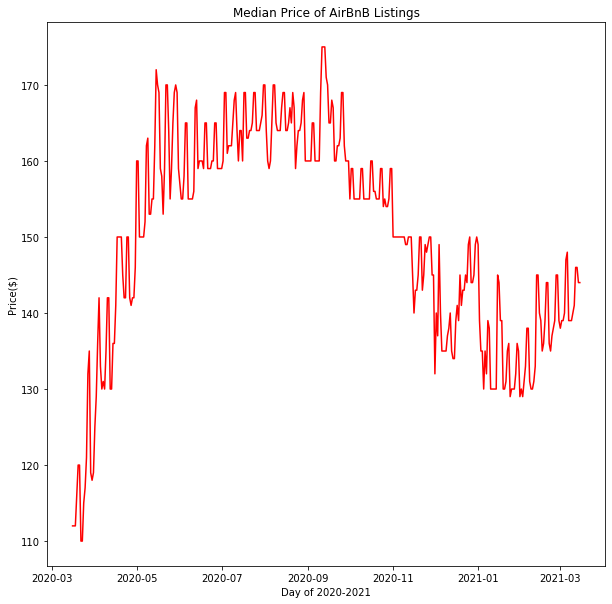


Computer >>  here you go
The User >> cool! can i have my recommendation?
Neighbourhood includes: 'East Boston', 'Roxbury', 'Beacon Hill', 'Back Bay', 'North End','Dorchester', 'South End', 'Charlestown', 'Jamaica Plain','Allston-Brighton', 'South Boston', 'Mattapan', 'Brookline','West Roxbury', 'Roslindale', 'Downtown', 'Mission Hill','Fenway/Kenmore', 'West End', 'Chinatown', 'Hyde Park','Downtown Crossing', 'Theater District', 'Government Center','Leather District', 'Financial District', 'Chestnut Hill','Somerville', 'Cambridge', 'Chelsea', 'Everett', 'Harvard Square'
Which neighbourhood would you like to book?East Boston
How many bedrooms would you like?2
How many bathrooms would you like?1


/Users/tower/Downloads/Team03-Final Project/reviews.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list2['score'] = pscores
/Users/tower/Downloads/Team03-Final Project/reviews.py:46: FutureWarning: `item` has been deprecated and will be removed in a future version
  freq.append(df2['reviews_per_month'].loc[df2['id']==i].item())


The Airbnb we recommend is id:  28868366
The name of the Airbnb is 2165    Walk to Airport, 5 min to Downtown
Name: name, dtype: object
would you like to check the avaliability of that listing? Reply "yes" or "no".yes
Please input the start day, as in 2 digit08
Please input the start month, as in 2 digit10
Please input the start year2020
Please input the end day, as in 2 digit10
Please input the end month, as in 2 digit10
Please input the end year2020

Computer >>          listing_id        date  adjusted_price  weekday
780106    28868366  2020-10-09           210.0        4
780107    28868366  2020-10-10           210.0        5
The User >> great! thank you!

Computer >>  I dont quite understand you


KeyboardInterrupt: 

In [22]:
chatbot()